In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as op

In [2]:
players_df = pd.read_excel('datasets/players.xlsx', sheet_name='Players')
players_df.head()

,MATCH_ID,MATCH_DATE,MATCH,PLAYER_ID,PLAYER,TEAM_NAME,POINTS,BET_VALUE,GOT_IT
0,299,2023-01-20,ATLANTA HAWKS - NEW YORK KNICKS,1,TRAE YOUNG,ATLANTA HAWKS,26.5,1.93,YES
1,321,2023-01-23,CHICAGO BULLS - ATLANTA HAWKS,1,TRAE YOUNG,ATLANTA HAWKS,26.5,1.93,NO
2,358,2023-01-28,ATLANTA HAWKS - LOS ANGELES CLIPPERS,1,TRAE YOUNG,ATLANTA HAWKS,-25.5,1.83,NO
3,465,2023-02-13,CHARLOTTE HORNETS - ATLANTA HAWKS,1,TRAE YOUNG,ATLANTA HAWKS,25.5,1.78,NO
4,519,2023-02-26,ATLANTA HAWKS - BROOKLYN NETS,1,TRAE YOUNG,ATLANTA HAWKS,-26.5,1.73,NO


## Let's start with some data cleaning

In [3]:
# I'll change the column names to lowercase
players_df = players_df.rename(columns=str.lower)
players_df.head()

,match_id,match_date,match,player_id,player,team_name,points,bet_value,got_it
0,299,2023-01-20,ATLANTA HAWKS - NEW YORK KNICKS,1,TRAE YOUNG,ATLANTA HAWKS,26.5,1.93,YES
1,321,2023-01-23,CHICAGO BULLS - ATLANTA HAWKS,1,TRAE YOUNG,ATLANTA HAWKS,26.5,1.93,NO
2,358,2023-01-28,ATLANTA HAWKS - LOS ANGELES CLIPPERS,1,TRAE YOUNG,ATLANTA HAWKS,-25.5,1.83,NO
3,465,2023-02-13,CHARLOTTE HORNETS - ATLANTA HAWKS,1,TRAE YOUNG,ATLANTA HAWKS,25.5,1.78,NO
4,519,2023-02-26,ATLANTA HAWKS - BROOKLYN NETS,1,TRAE YOUNG,ATLANTA HAWKS,-26.5,1.73,NO


In [4]:
players_df.dtypes

match_id               int64
match_date    datetime64[ns]
match                 object
player_id              int64
player                object
team_name             object
points               float64
bet_value            float64
got_it                object
dtype: object

In [5]:
# Due to the trade deadline that has taken place in the middle of February, some of the players have switched teams. For instance, Kevin Durant 
# has been playing for the Brooklyn Nets from the start of the season, but in the last day of trade deadline he has been traded to the Phoenix Suns. 
# That's why I've written the function below that changes the value in team_name column to match the specific team that he's been playing for 
# and is playing for in the timespan.

def traded_player(df, player, start_date, new_team_name):
    mask = (players_df['player'] == player) & (players_df['match_date'] >= start_date)
    players_df.loc[mask, 'team_name'] = new_team_name
    return players_df

In [6]:
players_df = traded_player(players_df, player='KEVIN DURANT', start_date='2023-02-09', new_team_name='PHOENIX SUNS')

In [7]:
# He debuted in the Phoenix Suns on March 1st, as you can see, the data matches!
players_df[players_df['player'] == 'KEVIN DURANT']

,match_id,match_date,match,player_id,player,team_name,points,bet_value,got_it
84,541,2023-03-01,CHARLOTTE HORNETS - PHOENIX SUNS,7,KEVIN DURANT,PHOENIX SUNS,20.5,1.95,YES
85,85,2022-12-21,BROOKLYN NETS - GOLDEN STATE WARRIORS,7,KEVIN DURANT,BROOKLYN NETS,27.5,1.82,NO
86,184,2023-01-04,CHICAGO BULLS - BROOKLYN NETS,7,KEVIN DURANT,BROOKLYN NETS,29.5,1.85,YES
87,196,2023-01-06,NEW ORLEANS PELICANS - BROOKLYN NETS,7,KEVIN DURANT,BROOKLYN NETS,28.5,1.78,YES
88,169,2023-01-02,BROOKLYN NETS - SAN ANTONIO SPURS,7,KEVIN DURANT,BROOKLYN NETS,28.5,1.75,NO
89,113,2022-12-26,CLEVELAND CAVALIERS - BROOKLYN NETS,7,KEVIN DURANT,BROOKLYN NETS,27.5,1.78,YES
90,131,2022-12-28,ATLANTA HAWKS - BROOKLYN NETS,7,KEVIN DURANT,BROOKLYN NETS,29.5,1.82,NO
91,213,2023-01-08,MIAMI HEAT - BROOKLYN NETS,7,KEVIN DURANT,BROOKLYN NETS,28.5,1.93,NO


In [8]:
# A few days earlier, the Brooklyn Nets have sent Kyrie Irving to the Dallas Mavericks
players_df = traded_player(players_df, player='KYRIE IRVING', start_date='2023-02-05', new_team_name='DALLAS MAVERICKS')
players_df[players_df['player'] == 'KYRIE IRVING']

,match_id,match_date,match,player_id,player,team_name,points,bet_value,got_it
92,302,2023-01-20,UTAH JAZZ - BROOKLYN NETS,8,KYRIE IRVING,BROOKLYN NETS,-29.5,1.80,NO
93,520,2023-02-26,DALLAS MAVERICKS - LOS ANGELES LAKERS,8,KYRIE IRVING,DALLAS MAVERICKS,25.5,1.80,NO
94,85,2022-12-21,BROOKLYN NETS - GOLDEN STATE WARRIORS,8,KYRIE IRVING,BROOKLYN NETS,-24.5,1.89,NO
95,184,2023-01-04,CHICAGO BULLS - BROOKLYN NETS,8,KYRIE IRVING,BROOKLYN NETS,26.5,1.85,NO
96,196,2023-01-06,NEW ORLEANS PELICANS - BROOKLYN NETS,8,KYRIE IRVING,BROOKLYN NETS,-26.5,1.88,YES
97,385,2023-02-01,BOSTON CELTICS - BROOKLYN NETS,8,KYRIE IRVING,BROOKLYN NETS,30.5,1.93,NO
98,169,2023-01-02,BROOKLYN NETS - SAN ANTONIO SPURS,8,KYRIE IRVING,BROOKLYN NETS,25.5,1.75,YES
99,462,2023-02-11,SACRAMENTO KINGS - DALLAS MAVERICKS,8,KYRIE IRVING,DALLAS MAVERICKS,24.5,1.78,YES
100,537,2023-02-28,DALLAS MAVERICKS - INDIANA PACERS,8,KYRIE IRVING,DALLAS MAVERICKS,24.5,1.82,NO
101,113,2022-12-26,CLEVELAND CAVALIERS - BROOKLYN NETS,8,KYRIE IRVING,BROOKLYN NETS,-23.5,1.95,NO


In [9]:
# The trade that landed Durant in Phoenix has sent Mikal Bridges to the Brooklyn Nets in exchange
players_df = traded_player(players_df, player='MIKAL BRIDGES', start_date='2023-02-09', new_team_name='BROOKLYN NETS')
players_df[players_df['player'] == 'MIKAL BRIDGES']

,match_id,match_date,match,player_id,player,team_name,points,bet_value,got_it
784,73,2022-12-19,PHOENIX SUNS - LOS ANGELES LAKERS,65,MIKAL BRIDGES,PHOENIX SUNS,-19.5,1.82,NO
785,239,2023-01-11,DENVER NUGGETS - PHOENIX SUNS,65,MIKAL BRIDGES,PHOENIX SUNS,17.5,1.80,NO
786,519,2023-02-26,ATLANTA HAWKS - BROOKLYN NETS,65,MIKAL BRIDGES,BROOKLYN NETS,20.5,1.93,YES
787,544,2023-03-01,NEW YORK KNICKS - BROOKLYN NETS,65,MIKAL BRIDGES,BROOKLYN NETS,20.5,1.85,YES
788,180,2023-01-04,CLEVELAND CAVALIERS - PHOENIX SUNS,65,MIKAL BRIDGES,PHOENIX SUNS,-15.5,1.82,YES
789,203,2023-01-06,PHOENIX SUNS - MIAMI HEAT,65,MIKAL BRIDGES,PHOENIX SUNS,-15.5,1.80,YES
790,390,2023-02-01,PHOENIX SUNS - ATLANTA HAWKS,65,MIKAL BRIDGES,PHOENIX SUNS,18.5,1.78,YES
791,78,2022-12-20,PHOENIX SUNS - WASHINGTON WIZARDS,65,MIKAL BRIDGES,PHOENIX SUNS,19.5,1.85,NO
792,111,2022-12-25,DENVER NUGGETS - PHOENIX SUNS,65,MIKAL BRIDGES,PHOENIX SUNS,16.5,1.90,NO
793,251,2023-01-13,MINNESOTA TIMBERWOLVES - PHOENIX SUNS,65,MIKAL BRIDGES,PHOENIX SUNS,-16.5,1.80,NO


## As you can see, now the team names are matching the timespan in which the players were playing for a specific team

In [10]:
# I want to see which player had the highest amount of successful bets, so now I'm going to create a dataframe that groups the data by 
# player and counts how many bets for them were successful; matching the value 'YES' in the got_it column
successful_bets = players_df[players_df['got_it'] == 'YES'].groupby('player').count()

In [11]:
successful_bets.head(10)

,match_id,match_date,match,player_id,team_name,points,bet_value,got_it
player,,,,,,,,
ANFERNEE SIMONS,9,9,9,9,9,9,9,9
ANTHONY DAVIS,2,2,2,2,2,2,2,2
ANTHONY EDWARDS,10,10,10,10,10,10,10,10
BAM ADEBAYO,8,8,8,8,8,8,8,8
BEN SIMMONS,1,1,1,1,1,1,1,1
BRANDON INGRAM,4,4,4,4,4,4,4,4
BUDDY HIELD,1,1,1,1,1,1,1,1
CHRIS PAUL,9,9,9,9,9,9,9,9
CHRISTIAN WOOD,5,5,5,5,5,5,5,5


In [12]:
top_player = successful_bets.idxmax().iloc[0]
print("Player with the highest number of successful bets is:", top_player)

Player with the highest number of successful bets is: JORDAN POOLE


In [13]:
# Now let's directly retrieve the number of successful bets for that player!
top_player_rows = players_df[players_df['player'] == top_player]
no_of_successful_bets = (top_player_rows['got_it'] == 'YES').sum()
print("The number of successful bets for {} is {}".format(top_player, no_of_successful_bets))

The number of successful bets for JORDAN POOLE is 15


In [14]:
# Similarly let's check which player has the least amount of successful bets
unsuccessful_bets = players_df[players_df['got_it'] == 'NO'].groupby('player').count()

In [15]:
unsuccessful_bets.head(10)

,match_id,match_date,match,player_id,team_name,points,bet_value,got_it
player,,,,,,,,
ANFERNEE SIMONS,6,6,6,6,6,6,6,6
ANTHONY EDWARDS,10,10,10,10,10,10,10,10
BAM ADEBAYO,11,11,11,11,11,11,11,11
BRADLEY BEAL,6,6,6,6,6,6,6,6
BRANDON INGRAM,6,6,6,6,6,6,6,6
BUDDY HIELD,1,1,1,1,1,1,1,1
CHRIS PAUL,10,10,10,10,10,10,10,10
CHRISTIAN WOOD,6,6,6,6,6,6,6,6
CJ MCCOLLUM,12,12,12,12,12,12,12,12


In [16]:
bottom_player = unsuccessful_bets.idxmax().iloc[0]
print("Player with the lowest amount of successful bets is: {}".format(bottom_player))

Player with the lowest amount of successful bets is: DONOVAN MITCHELL


In [17]:
# And similarly as well, let's retrieve the number of them bets!
bottom_player_rows = players_df[players_df['player'] == bottom_player]
no_of_unsuccessful_bets = (bottom_player_rows['got_it'] == 'NO').sum()
print("The number of unsuccessful bets for {} is {}".format(bottom_player, no_of_unsuccessful_bets))

The number of unsuccessful bets for DONOVAN MITCHELL is 15


## Let's check the average value of a successful bet

In [18]:
# I'm going to group the data by the got_it column and calculate the mean of the bet_value column for each group
success_bets = players_df.groupby('got_it').get_group('YES')
mean_bet_value = success_bets['bet_value'].mean()
print("The Average value for a successful bet is {}".format(mean_bet_value))

The Average value for a successful bet is 1.8105162523900573


## Which team has players with the highest line of predicted points?

In [19]:
# In this example, I'm grouping the data by the team_name column and then calculating the mean of points column for each group
mean_points = players_df.groupby('team_name')['points'].mean()
teams_points = mean_points.idxmax()
print("{} has the highest average predicted points".format(teams_points))

MILWAUKEE BUCKS has the highest average predicted points


## Which player had the highest predicted points value?

In [20]:
# For this, I'm using the idxmax() method to get the index of the row with the highest value, and then loc[] to retrieve the corresponding information
# about the player
max_points_index = players_df['points'].idxmax()
max_points_player = players_df.loc[max_points_index, 'player']
max_points = players_df.loc[max_points_index, 'points']
print("The player with the highest line of predicted points in an NBA game is {} with {}".format(max_points_player, max_points))

The player with the highest line of predicted points in an NBA game is DAMIAN LILLARD with 37.5


## Let's go on with some visiualizations concering players with the highest amount of bets

In [21]:
# First I'll get the data from the dataframe, grouping it by player_id and player, counting the number of bets for each player.
bets = players_df.groupby(['player_id', 'player'])['got_it'].count()

# And then convert it into a pandas series in descending order
most_bets = bets.sort_values(ascending=False).head(10)

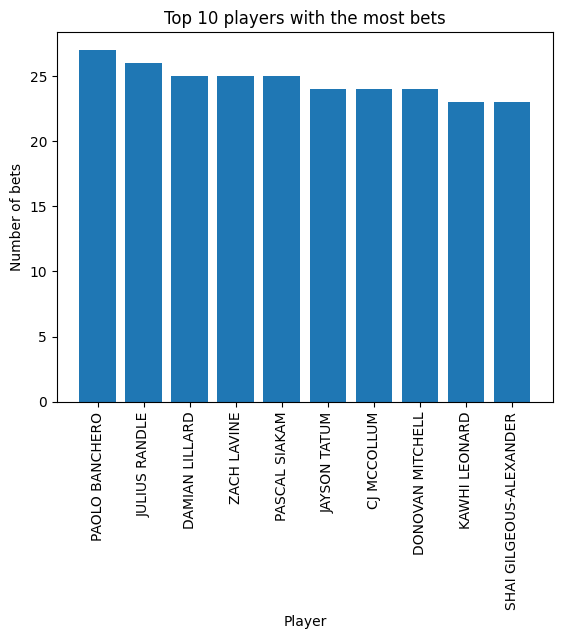

In [22]:
# Now I'm using the bar() function to create a bar chart of number of bets for each player, using the index.get_level_values(1) 
# to extract the player names from the index, and the values attribute to get the number of bets for each player
plt.bar(most_bets.index.get_level_values(1), most_bets.values)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Number of bets')
plt.title('Top 10 players with the most bets')
plt.show()

In [23]:
# Now I want to calculate the average value for a bet for those players
# To do this, I'm grouping the data from the dataframe by player_id 

top_10_players = players_df.groupby('player').size().nlargest(10).index

# Then I'm getting the data into a separate dataframe using isin() method
top_10_data = players_df[players_df['player'].isin(top_10_players)]

# And of course, we have to calculate the average value using groupby once again along with mean
average_bet_value = top_10_data.groupby('player')['bet_value'].mean()

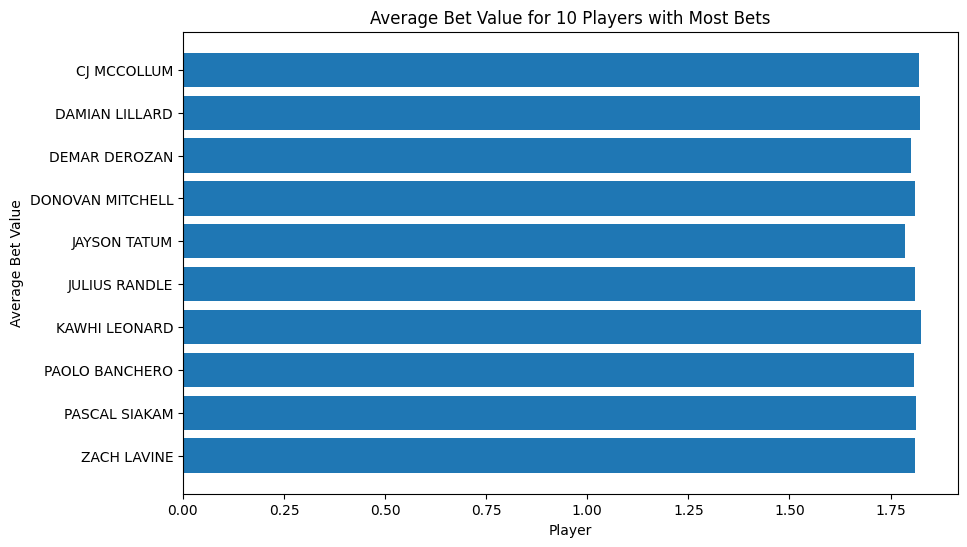

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(average_bet_value.index, average_bet_value.values)
ax.set_title('Average Bet Value for 10 Players with Most Bets')
ax.set_xlabel('Player')
ax.set_ylabel('Average Bet Value')
plt.gca().invert_yaxis() # I'm inverting the y-axis to show players at the top
plt.show()

## The above chart doesn't say much, so let's move on to bets that were successful

In [25]:
# I'm creating a pandas series with the data grouped by player and counting total number of bets
bets2 = players_df.groupby('player').size().sort_values(ascending=False)[:10]

In [26]:
# Now let's use the for loop to count the number of successful bets for each player!
successful_bets = []
for player in bets2.index:
    success = players_df[(players_df['player'] == player) & (players_df['got_it'] == 'YES')].shape[0]
    successful_bets.append(success)

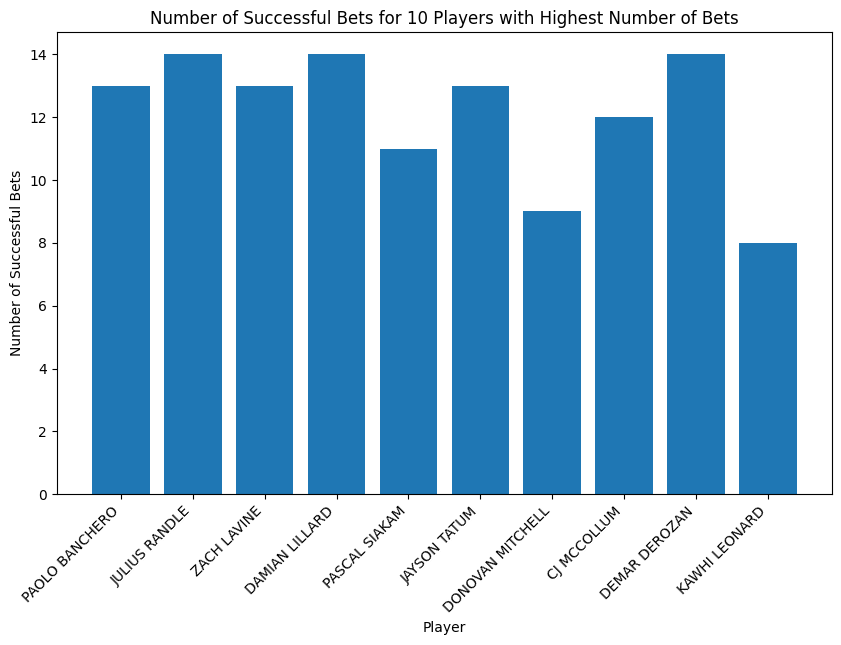

In [27]:
# Finally, it's time for a bar chart once again, with player's name on x-axis and 
# number of successful bets on the y-axis
plt.figure(figsize=(10,6))
plt.bar(bets2.index, successful_bets)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Player')
plt.ylabel('Number of Successful Bets')
plt.title('Number of Successful Bets for 10 Players with Highest Number of Bets')
plt.show()